In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_38876\499694536.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

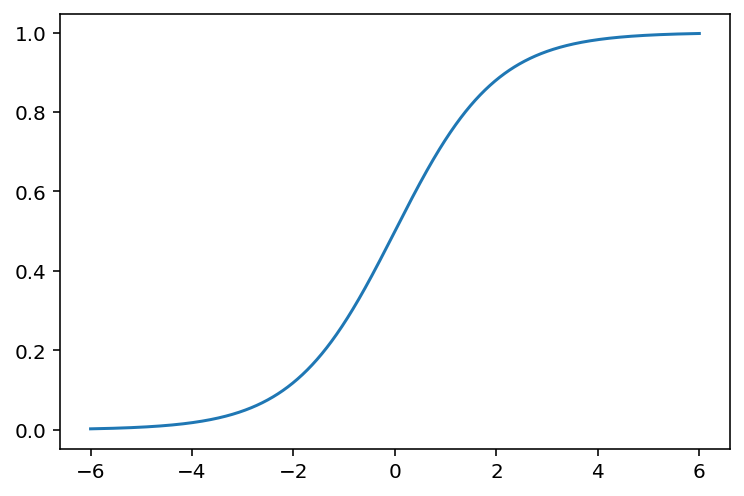

In [2]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1001)
y = 1/(1+np.exp(-x))
_ = plt.plot(x, y)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', SGDClassifier(loss='log_loss', max_iter=100))]

sgd_clf = Pipeline(steps=steps)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9130434782608695

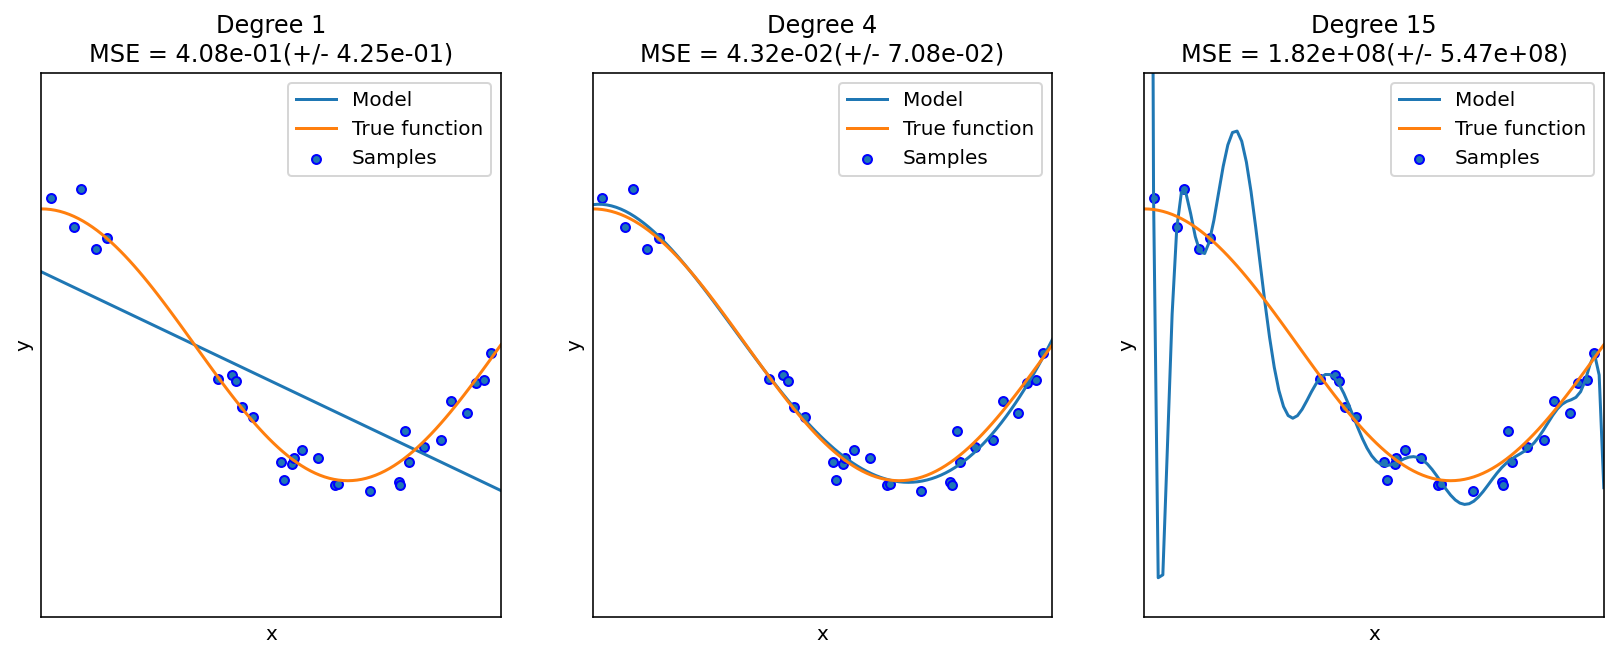

In [6]:
#| echo: false
#| column: page
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
# plt.show()

In [7]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

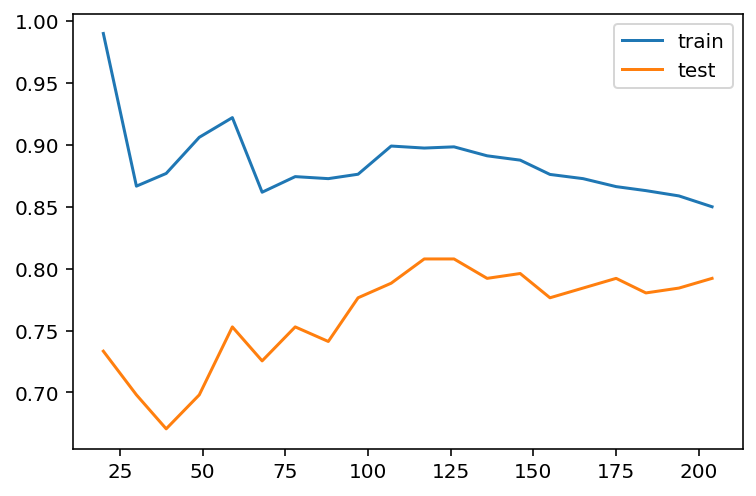

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegression(max_iter=1000)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

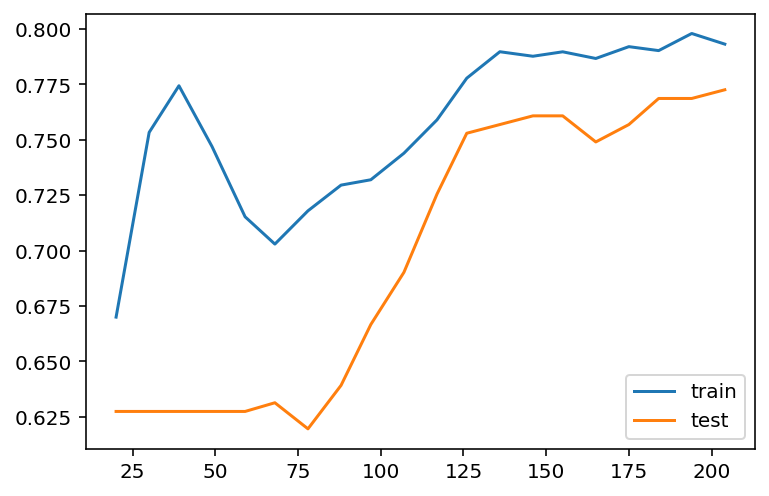

In [9]:
clf = LogisticRegression(max_iter=1000, C=0.1)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

In [10]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [12]:
#| output: false
import keras_core as keras
from keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))

Using TensorFlow backend


Epoch 1/400


1/9 [==>...........................] - ETA: 3s - loss: 0.7388 - accuracy: 0.4667

9/9 [==============================] - 1s 23ms/step - loss: 0.6467 - accuracy: 0.6157 - val_loss: 0.6408 - val_accuracy: 0.6889


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6437 - accuracy: 0.6157 - val_loss: 0.6397 - val_accuracy: 0.6889


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7112 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6157 - val_loss: 0.6388 - val_accuracy: 0.6889


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.6157 - val_loss: 0.6377 - val_accuracy: 0.6889


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6966 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.6157 - val_loss: 0.6372 - val_accuracy: 0.6889


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7849 - accuracy: 0.4333

9/9 [==============================] - 0s 7ms/step - loss: 0.6353 - accuracy: 0.6118 - val_loss: 0.6367 - val_accuracy: 0.6889


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6118 - val_loss: 0.6357 - val_accuracy: 0.6889


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6027 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6313 - accuracy: 0.6118 - val_loss: 0.6350 - val_accuracy: 0.6889


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7540 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6294 - accuracy: 0.6118 - val_loss: 0.6341 - val_accuracy: 0.6889


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6276 - accuracy: 0.6118 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7157 - accuracy: 0.5000

9/9 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.6157 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6240 - accuracy: 0.6196 - val_loss: 0.6314 - val_accuracy: 0.6889


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6590 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6221 - accuracy: 0.6157 - val_loss: 0.6305 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6759 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6205 - accuracy: 0.6157 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.5667

9/9 [==============================] - 0s 11ms/step - loss: 0.6186 - accuracy: 0.6196 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6170 - accuracy: 0.6235 - val_loss: 0.6276 - val_accuracy: 0.6667


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6187 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6152 - accuracy: 0.6196 - val_loss: 0.6263 - val_accuracy: 0.6667


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5794 - accuracy: 0.7000

9/9 [==============================] - 0s 11ms/step - loss: 0.6135 - accuracy: 0.6196 - val_loss: 0.6250 - val_accuracy: 0.6667


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6444


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6444


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6087 - accuracy: 0.6314 - val_loss: 0.6232 - val_accuracy: 0.6444


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5704 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6353 - val_loss: 0.6224 - val_accuracy: 0.6444


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6056 - accuracy: 0.6353 - val_loss: 0.6208 - val_accuracy: 0.6444


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6135 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6040 - accuracy: 0.6431 - val_loss: 0.6200 - val_accuracy: 0.6444


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6026 - accuracy: 0.6471 - val_loss: 0.6194 - val_accuracy: 0.6444


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5967 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6013 - accuracy: 0.6431 - val_loss: 0.6187 - val_accuracy: 0.6444


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5008 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5998 - accuracy: 0.6510 - val_loss: 0.6174 - val_accuracy: 0.6444


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.5984 - accuracy: 0.6471 - val_loss: 0.6164 - val_accuracy: 0.6444


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6965 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.5971 - accuracy: 0.6471 - val_loss: 0.6155 - val_accuracy: 0.6444


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5981 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.5958 - accuracy: 0.6471 - val_loss: 0.6145 - val_accuracy: 0.6444


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.5945 - accuracy: 0.6471 - val_loss: 0.6135 - val_accuracy: 0.6444


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6387 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5931 - accuracy: 0.6471 - val_loss: 0.6128 - val_accuracy: 0.6444


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.5918 - accuracy: 0.6588 - val_loss: 0.6122 - val_accuracy: 0.6444


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.5910 - accuracy: 0.6706 - val_loss: 0.6121 - val_accuracy: 0.6444


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.5893 - accuracy: 0.6706 - val_loss: 0.6108 - val_accuracy: 0.6444


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5570 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5881 - accuracy: 0.6706 - val_loss: 0.6096 - val_accuracy: 0.6444


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.5868 - accuracy: 0.6706 - val_loss: 0.6093 - val_accuracy: 0.6444


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.5857 - accuracy: 0.6784 - val_loss: 0.6085 - val_accuracy: 0.6444


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.6863 - val_loss: 0.6078 - val_accuracy: 0.6444


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.5832 - accuracy: 0.6902 - val_loss: 0.6070 - val_accuracy: 0.6444


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7000

9/9 [==============================] - 0s 11ms/step - loss: 0.5822 - accuracy: 0.6902 - val_loss: 0.6056 - val_accuracy: 0.6444


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5838 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.5809 - accuracy: 0.6902 - val_loss: 0.6051 - val_accuracy: 0.6444


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5798 - accuracy: 0.6941 - val_loss: 0.6041 - val_accuracy: 0.6444


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5786 - accuracy: 0.6941 - val_loss: 0.6034 - val_accuracy: 0.6444


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5706 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.5775 - accuracy: 0.6941 - val_loss: 0.6028 - val_accuracy: 0.6444


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6387 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.5764 - accuracy: 0.7020 - val_loss: 0.6026 - val_accuracy: 0.6444


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5818 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.5753 - accuracy: 0.7020 - val_loss: 0.6017 - val_accuracy: 0.6444


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.7059 - val_loss: 0.6016 - val_accuracy: 0.6667


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5047 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.7059 - val_loss: 0.6005 - val_accuracy: 0.6667


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.5721 - accuracy: 0.7059 - val_loss: 0.6004 - val_accuracy: 0.6667


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.7333

9/9 [==============================] - 0s 12ms/step - loss: 0.5710 - accuracy: 0.7059 - val_loss: 0.5996 - val_accuracy: 0.6667


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.5700 - accuracy: 0.7059 - val_loss: 0.5986 - val_accuracy: 0.6667


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5690 - accuracy: 0.7098 - val_loss: 0.5984 - val_accuracy: 0.6667


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5557 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.5679 - accuracy: 0.7137 - val_loss: 0.5979 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5670 - accuracy: 0.7098 - val_loss: 0.5971 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5660 - accuracy: 0.7176 - val_loss: 0.5970 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.5650 - accuracy: 0.7216 - val_loss: 0.5966 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.5641 - accuracy: 0.7216 - val_loss: 0.5957 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6096 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.5631 - accuracy: 0.7255 - val_loss: 0.5948 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5621 - accuracy: 0.7255 - val_loss: 0.5939 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.7255 - val_loss: 0.5930 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.5604 - accuracy: 0.7294 - val_loss: 0.5931 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5388 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5594 - accuracy: 0.7333 - val_loss: 0.5928 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5585 - accuracy: 0.7333 - val_loss: 0.5925 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7333 - val_loss: 0.5917 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4992 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.5568 - accuracy: 0.7373 - val_loss: 0.5914 - val_accuracy: 0.6667


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8000

9/9 [==============================] - 0s 12ms/step - loss: 0.5559 - accuracy: 0.7451 - val_loss: 0.5912 - val_accuracy: 0.6667


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5550 - accuracy: 0.7451 - val_loss: 0.5914 - val_accuracy: 0.6444


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5193 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5542 - accuracy: 0.7451 - val_loss: 0.5910 - val_accuracy: 0.6444


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4745 - accuracy: 0.9000

9/9 [==============================] - 0s 10ms/step - loss: 0.5536 - accuracy: 0.7490 - val_loss: 0.5913 - val_accuracy: 0.6444


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5657 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5525 - accuracy: 0.7529 - val_loss: 0.5908 - val_accuracy: 0.6667


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.5517 - accuracy: 0.7529 - val_loss: 0.5903 - val_accuracy: 0.6667


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4933 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5511 - accuracy: 0.7529 - val_loss: 0.5892 - val_accuracy: 0.6667


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5502 - accuracy: 0.7529 - val_loss: 0.5892 - val_accuracy: 0.6667


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.5493 - accuracy: 0.7529 - val_loss: 0.5888 - val_accuracy: 0.6667


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.5485 - accuracy: 0.7569 - val_loss: 0.5881 - val_accuracy: 0.6667


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7000

9/9 [==============================] - 0s 11ms/step - loss: 0.5477 - accuracy: 0.7529 - val_loss: 0.5879 - val_accuracy: 0.6667


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7608 - val_loss: 0.5878 - val_accuracy: 0.6667


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5465 - accuracy: 0.7608 - val_loss: 0.5866 - val_accuracy: 0.6667


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7647 - val_loss: 0.5870 - val_accuracy: 0.6667


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5447 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5448 - accuracy: 0.7725 - val_loss: 0.5868 - val_accuracy: 0.6667


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7725 - val_loss: 0.5860 - val_accuracy: 0.6667


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7686 - val_loss: 0.5852 - val_accuracy: 0.6667


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5427 - accuracy: 0.7725 - val_loss: 0.5852 - val_accuracy: 0.6667


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.7725 - val_loss: 0.5847 - val_accuracy: 0.6667


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5413 - accuracy: 0.7725 - val_loss: 0.5838 - val_accuracy: 0.6667


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5405 - accuracy: 0.7725 - val_loss: 0.5836 - val_accuracy: 0.6667


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.5398 - accuracy: 0.7725 - val_loss: 0.5828 - val_accuracy: 0.6667


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.5392 - accuracy: 0.7725 - val_loss: 0.5826 - val_accuracy: 0.6667


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.5387 - accuracy: 0.7765 - val_loss: 0.5828 - val_accuracy: 0.6667


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5378 - accuracy: 0.7804 - val_loss: 0.5819 - val_accuracy: 0.6667


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.7804 - val_loss: 0.5820 - val_accuracy: 0.6667


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.5366 - accuracy: 0.7804 - val_loss: 0.5814 - val_accuracy: 0.6667


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5358 - accuracy: 0.7804 - val_loss: 0.5808 - val_accuracy: 0.6667


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5233 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.5353 - accuracy: 0.7804 - val_loss: 0.5799 - val_accuracy: 0.6667


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.5347 - accuracy: 0.7804 - val_loss: 0.5793 - val_accuracy: 0.6667


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4871 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.5341 - accuracy: 0.7804 - val_loss: 0.5792 - val_accuracy: 0.6667


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.5334 - accuracy: 0.7804 - val_loss: 0.5791 - val_accuracy: 0.6667


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7843 - val_loss: 0.5790 - val_accuracy: 0.6667


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5690 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7843 - val_loss: 0.5786 - val_accuracy: 0.6667


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5315 - accuracy: 0.7843 - val_loss: 0.5782 - val_accuracy: 0.6667


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.7843 - val_loss: 0.5779 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.7843 - val_loss: 0.5775 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5542 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.7765 - val_loss: 0.5778 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.7725 - val_loss: 0.5773 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5287 - accuracy: 0.7725 - val_loss: 0.5776 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5280 - accuracy: 0.7725 - val_loss: 0.5773 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.7725 - val_loss: 0.5769 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4745 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.5268 - accuracy: 0.7725 - val_loss: 0.5767 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.5264 - accuracy: 0.7725 - val_loss: 0.5768 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5044 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.5258 - accuracy: 0.7725 - val_loss: 0.5763 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5060 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.5253 - accuracy: 0.7725 - val_loss: 0.5764 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.5247 - accuracy: 0.7725 - val_loss: 0.5761 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5494 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.5242 - accuracy: 0.7686 - val_loss: 0.5762 - val_accuracy: 0.6667


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.5237 - accuracy: 0.7686 - val_loss: 0.5760 - val_accuracy: 0.6667


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5231 - accuracy: 0.7686 - val_loss: 0.5756 - val_accuracy: 0.6667


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4725 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.7686 - val_loss: 0.5751 - val_accuracy: 0.6667


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.9000

9/9 [==============================] - 0s 9ms/step - loss: 0.5220 - accuracy: 0.7686 - val_loss: 0.5752 - val_accuracy: 0.6667


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.5215 - accuracy: 0.7686 - val_loss: 0.5753 - val_accuracy: 0.6667


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.5211 - accuracy: 0.7686 - val_loss: 0.5747 - val_accuracy: 0.6667


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6100 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.5207 - accuracy: 0.7686 - val_loss: 0.5751 - val_accuracy: 0.6444


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.5200 - accuracy: 0.7647 - val_loss: 0.5743 - val_accuracy: 0.6444


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.5196 - accuracy: 0.7686 - val_loss: 0.5735 - val_accuracy: 0.6667


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5190 - accuracy: 0.7686 - val_loss: 0.5733 - val_accuracy: 0.6667


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 0.7647 - val_loss: 0.5737 - val_accuracy: 0.6444


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.5180 - accuracy: 0.7647 - val_loss: 0.5734 - val_accuracy: 0.6444


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5809 - accuracy: 0.6667

9/9 [==============================] - 0s 12ms/step - loss: 0.5175 - accuracy: 0.7647 - val_loss: 0.5736 - val_accuracy: 0.6444


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4745 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.5170 - accuracy: 0.7725 - val_loss: 0.5733 - val_accuracy: 0.6444


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.5165 - accuracy: 0.7725 - val_loss: 0.5731 - val_accuracy: 0.6444


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5160 - accuracy: 0.7725 - val_loss: 0.5729 - val_accuracy: 0.6444


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5155 - accuracy: 0.7725 - val_loss: 0.5725 - val_accuracy: 0.6444


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4842 - accuracy: 0.9000

9/9 [==============================] - 0s 7ms/step - loss: 0.5150 - accuracy: 0.7725 - val_loss: 0.5722 - val_accuracy: 0.6444


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5141 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5146 - accuracy: 0.7725 - val_loss: 0.5716 - val_accuracy: 0.6444


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.7686 - val_loss: 0.5714 - val_accuracy: 0.6444


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5617 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.5138 - accuracy: 0.7686 - val_loss: 0.5702 - val_accuracy: 0.6444


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.5132 - accuracy: 0.7686 - val_loss: 0.5704 - val_accuracy: 0.6444


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4948 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5128 - accuracy: 0.7647 - val_loss: 0.5704 - val_accuracy: 0.6444


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5124 - accuracy: 0.7686 - val_loss: 0.5706 - val_accuracy: 0.6222


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.7647 - val_loss: 0.5702 - val_accuracy: 0.6222


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5114 - accuracy: 0.7647 - val_loss: 0.5696 - val_accuracy: 0.6222


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5974 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.5111 - accuracy: 0.7647 - val_loss: 0.5697 - val_accuracy: 0.6222


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5105 - accuracy: 0.7647 - val_loss: 0.5693 - val_accuracy: 0.6222


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5710 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5101 - accuracy: 0.7647 - val_loss: 0.5691 - val_accuracy: 0.6222


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5096 - accuracy: 0.7647 - val_loss: 0.5686 - val_accuracy: 0.6222


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5093 - accuracy: 0.7647 - val_loss: 0.5687 - val_accuracy: 0.6222


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.5088 - accuracy: 0.7686 - val_loss: 0.5689 - val_accuracy: 0.6222


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5083 - accuracy: 0.7725 - val_loss: 0.5685 - val_accuracy: 0.6222


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.9000

9/9 [==============================] - 0s 7ms/step - loss: 0.5079 - accuracy: 0.7725 - val_loss: 0.5688 - val_accuracy: 0.6222


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7765 - val_loss: 0.5688 - val_accuracy: 0.6444


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.7725 - val_loss: 0.5693 - val_accuracy: 0.6444


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.5066 - accuracy: 0.7725 - val_loss: 0.5698 - val_accuracy: 0.6667


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.7765 - val_loss: 0.5695 - val_accuracy: 0.6667


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5058 - accuracy: 0.7765 - val_loss: 0.5690 - val_accuracy: 0.6444


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5054 - accuracy: 0.7765 - val_loss: 0.5687 - val_accuracy: 0.6444


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.5051 - accuracy: 0.7765 - val_loss: 0.5682 - val_accuracy: 0.6444


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.5045 - accuracy: 0.7765 - val_loss: 0.5681 - val_accuracy: 0.6444


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7765 - val_loss: 0.5687 - val_accuracy: 0.6667


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.7804 - val_loss: 0.5690 - val_accuracy: 0.6667


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5033 - accuracy: 0.7804 - val_loss: 0.5687 - val_accuracy: 0.6667


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5029 - accuracy: 0.7804 - val_loss: 0.5687 - val_accuracy: 0.6667


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5025 - accuracy: 0.7804 - val_loss: 0.5692 - val_accuracy: 0.6667


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.5021 - accuracy: 0.7804 - val_loss: 0.5689 - val_accuracy: 0.6667


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.5018 - accuracy: 0.7804 - val_loss: 0.5695 - val_accuracy: 0.6667


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.5013 - accuracy: 0.7804 - val_loss: 0.5691 - val_accuracy: 0.6667


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.7804 - val_loss: 0.5686 - val_accuracy: 0.6667


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.7804 - val_loss: 0.5680 - val_accuracy: 0.6667


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.5001 - accuracy: 0.7804 - val_loss: 0.5673 - val_accuracy: 0.6667


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5021 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4997 - accuracy: 0.7843 - val_loss: 0.5666 - val_accuracy: 0.6667


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.4993 - accuracy: 0.7843 - val_loss: 0.5666 - val_accuracy: 0.6667


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5037 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.7843 - val_loss: 0.5662 - val_accuracy: 0.6667


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.7804 - val_loss: 0.5664 - val_accuracy: 0.6667


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4982 - accuracy: 0.7804 - val_loss: 0.5661 - val_accuracy: 0.6667


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5256 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4978 - accuracy: 0.7804 - val_loss: 0.5661 - val_accuracy: 0.6667


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4975 - accuracy: 0.7804 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4972 - accuracy: 0.7804 - val_loss: 0.5670 - val_accuracy: 0.6667


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4967 - accuracy: 0.7804 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5201 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.4964 - accuracy: 0.7804 - val_loss: 0.5666 - val_accuracy: 0.6667


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8667

9/9 [==============================] - 0s 11ms/step - loss: 0.4961 - accuracy: 0.7804 - val_loss: 0.5666 - val_accuracy: 0.6667


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5888 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.4957 - accuracy: 0.7804 - val_loss: 0.5660 - val_accuracy: 0.6667


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5212 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7804 - val_loss: 0.5659 - val_accuracy: 0.6667


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4949 - accuracy: 0.7804 - val_loss: 0.5655 - val_accuracy: 0.6667


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4946 - accuracy: 0.7804 - val_loss: 0.5650 - val_accuracy: 0.6667


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4943 - accuracy: 0.7804 - val_loss: 0.5649 - val_accuracy: 0.6667


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4938 - accuracy: 0.7804 - val_loss: 0.5649 - val_accuracy: 0.6667


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.9000

9/9 [==============================] - 0s 7ms/step - loss: 0.4935 - accuracy: 0.7804 - val_loss: 0.5644 - val_accuracy: 0.6667


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.9333

9/9 [==============================] - 0s 11ms/step - loss: 0.4932 - accuracy: 0.7804 - val_loss: 0.5638 - val_accuracy: 0.6667


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4928 - accuracy: 0.7804 - val_loss: 0.5640 - val_accuracy: 0.6667


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4925 - accuracy: 0.7804 - val_loss: 0.5643 - val_accuracy: 0.6667


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4921 - accuracy: 0.7804 - val_loss: 0.5641 - val_accuracy: 0.6667


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4919 - accuracy: 0.7804 - val_loss: 0.5635 - val_accuracy: 0.6667


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.8333

9/9 [==============================] - 0s 12ms/step - loss: 0.4914 - accuracy: 0.7804 - val_loss: 0.5637 - val_accuracy: 0.6667


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5221 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4911 - accuracy: 0.7804 - val_loss: 0.5634 - val_accuracy: 0.6667


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4907 - accuracy: 0.7804 - val_loss: 0.5634 - val_accuracy: 0.6667


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4119 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4904 - accuracy: 0.7804 - val_loss: 0.5630 - val_accuracy: 0.6667


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.7804 - val_loss: 0.5632 - val_accuracy: 0.6667


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.7804 - val_loss: 0.5632 - val_accuracy: 0.6667


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.4896 - accuracy: 0.7804 - val_loss: 0.5623 - val_accuracy: 0.6667


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.4891 - accuracy: 0.7804 - val_loss: 0.5634 - val_accuracy: 0.6667


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4887 - accuracy: 0.7804 - val_loss: 0.5636 - val_accuracy: 0.6667


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4278 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4884 - accuracy: 0.7804 - val_loss: 0.5635 - val_accuracy: 0.6667


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8667

9/9 [==============================] - 0s 10ms/step - loss: 0.4881 - accuracy: 0.7804 - val_loss: 0.5636 - val_accuracy: 0.6667


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.4878 - accuracy: 0.7804 - val_loss: 0.5635 - val_accuracy: 0.6667


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.9000

9/9 [==============================] - 0s 10ms/step - loss: 0.4875 - accuracy: 0.7804 - val_loss: 0.5630 - val_accuracy: 0.6667


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7333

9/9 [==============================] - 0s 12ms/step - loss: 0.4874 - accuracy: 0.7804 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8000

9/9 [==============================] - 0s 12ms/step - loss: 0.4870 - accuracy: 0.7804 - val_loss: 0.5611 - val_accuracy: 0.6667


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5358 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4866 - accuracy: 0.7804 - val_loss: 0.5615 - val_accuracy: 0.6667


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4863 - accuracy: 0.7804 - val_loss: 0.5611 - val_accuracy: 0.6667


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4860 - accuracy: 0.7804 - val_loss: 0.5616 - val_accuracy: 0.6667


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9000

9/9 [==============================] - 0s 7ms/step - loss: 0.4856 - accuracy: 0.7804 - val_loss: 0.5613 - val_accuracy: 0.6667


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.4853 - accuracy: 0.7843 - val_loss: 0.5614 - val_accuracy: 0.6667


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.4850 - accuracy: 0.7843 - val_loss: 0.5612 - val_accuracy: 0.6667


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.4847 - accuracy: 0.7843 - val_loss: 0.5616 - val_accuracy: 0.6667


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4843 - accuracy: 0.7843 - val_loss: 0.5615 - val_accuracy: 0.6667


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4841 - accuracy: 0.7843 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4702 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.4839 - accuracy: 0.7843 - val_loss: 0.5610 - val_accuracy: 0.6667


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8000

9/9 [==============================] - 0s 12ms/step - loss: 0.4835 - accuracy: 0.7843 - val_loss: 0.5610 - val_accuracy: 0.6667


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.9333

9/9 [==============================] - 0s 10ms/step - loss: 0.4832 - accuracy: 0.7843 - val_loss: 0.5610 - val_accuracy: 0.6667


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4828 - accuracy: 0.7843 - val_loss: 0.5612 - val_accuracy: 0.6667


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4825 - accuracy: 0.7843 - val_loss: 0.5614 - val_accuracy: 0.6667


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4823 - accuracy: 0.7843 - val_loss: 0.5620 - val_accuracy: 0.6667


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.9333

9/9 [==============================] - 0s 10ms/step - loss: 0.4819 - accuracy: 0.7843 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4816 - accuracy: 0.7843 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.7843 - val_loss: 0.5612 - val_accuracy: 0.6667


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4386 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4811 - accuracy: 0.7843 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.9000

9/9 [==============================] - 0s 7ms/step - loss: 0.4808 - accuracy: 0.7843 - val_loss: 0.5618 - val_accuracy: 0.6667


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.4805 - accuracy: 0.7882 - val_loss: 0.5622 - val_accuracy: 0.6667


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5121 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4803 - accuracy: 0.7843 - val_loss: 0.5625 - val_accuracy: 0.6667


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4718 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4799 - accuracy: 0.7843 - val_loss: 0.5617 - val_accuracy: 0.6667


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.8333

9/9 [==============================] - 0s 12ms/step - loss: 0.4797 - accuracy: 0.7882 - val_loss: 0.5606 - val_accuracy: 0.6667


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4793 - accuracy: 0.7843 - val_loss: 0.5606 - val_accuracy: 0.6667


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4680 - accuracy: 0.8000

9/9 [==============================] - 0s 12ms/step - loss: 0.4790 - accuracy: 0.7804 - val_loss: 0.5604 - val_accuracy: 0.6667


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5183 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4787 - accuracy: 0.7804 - val_loss: 0.5606 - val_accuracy: 0.6667


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.4784 - accuracy: 0.7843 - val_loss: 0.5607 - val_accuracy: 0.6667


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7843 - val_loss: 0.5615 - val_accuracy: 0.6667


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.4779 - accuracy: 0.7843 - val_loss: 0.5611 - val_accuracy: 0.6667


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5438 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.4776 - accuracy: 0.7843 - val_loss: 0.5607 - val_accuracy: 0.6667


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.7843 - val_loss: 0.5606 - val_accuracy: 0.6667


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.7843 - val_loss: 0.5599 - val_accuracy: 0.6667


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.7843 - val_loss: 0.5596 - val_accuracy: 0.6667


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4766 - accuracy: 0.7843 - val_loss: 0.5591 - val_accuracy: 0.6667


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5671 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.4763 - accuracy: 0.7843 - val_loss: 0.5590 - val_accuracy: 0.6667


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.4761 - accuracy: 0.7843 - val_loss: 0.5594 - val_accuracy: 0.6667


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4757 - accuracy: 0.7843 - val_loss: 0.5590 - val_accuracy: 0.6667


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.6333

9/9 [==============================] - 0s 11ms/step - loss: 0.4755 - accuracy: 0.7843 - val_loss: 0.5591 - val_accuracy: 0.6667


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.7000

9/9 [==============================] - 0s 12ms/step - loss: 0.4752 - accuracy: 0.7843 - val_loss: 0.5587 - val_accuracy: 0.6667


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5828 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.4752 - accuracy: 0.7843 - val_loss: 0.5574 - val_accuracy: 0.6667


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4748 - accuracy: 0.7804 - val_loss: 0.5573 - val_accuracy: 0.6667


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4993 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4745 - accuracy: 0.7804 - val_loss: 0.5577 - val_accuracy: 0.6667


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.4742 - accuracy: 0.7804 - val_loss: 0.5579 - val_accuracy: 0.6667


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4739 - accuracy: 0.7843 - val_loss: 0.5581 - val_accuracy: 0.6667


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4934 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.7843 - val_loss: 0.5583 - val_accuracy: 0.6667


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4733 - accuracy: 0.7882 - val_loss: 0.5585 - val_accuracy: 0.6667


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4731 - accuracy: 0.7882 - val_loss: 0.5585 - val_accuracy: 0.6667


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4728 - accuracy: 0.7843 - val_loss: 0.5589 - val_accuracy: 0.6667


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4726 - accuracy: 0.7882 - val_loss: 0.5586 - val_accuracy: 0.6667


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4723 - accuracy: 0.7882 - val_loss: 0.5580 - val_accuracy: 0.6667


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.4720 - accuracy: 0.7882 - val_loss: 0.5584 - val_accuracy: 0.6667


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7000

9/9 [==============================] - 0s 12ms/step - loss: 0.4718 - accuracy: 0.7882 - val_loss: 0.5584 - val_accuracy: 0.6667


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4715 - accuracy: 0.7882 - val_loss: 0.5581 - val_accuracy: 0.6667


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5026 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7882 - val_loss: 0.5579 - val_accuracy: 0.6667


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4710 - accuracy: 0.7882 - val_loss: 0.5576 - val_accuracy: 0.6667


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.9333

9/9 [==============================] - 0s 8ms/step - loss: 0.4708 - accuracy: 0.7882 - val_loss: 0.5573 - val_accuracy: 0.6667


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4705 - accuracy: 0.7882 - val_loss: 0.5577 - val_accuracy: 0.6667


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.4705 - accuracy: 0.7882 - val_loss: 0.5586 - val_accuracy: 0.6667


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.4700 - accuracy: 0.7882 - val_loss: 0.5582 - val_accuracy: 0.6667


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5781 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7882 - val_loss: 0.5584 - val_accuracy: 0.6667


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.7882 - val_loss: 0.5577 - val_accuracy: 0.6667


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4694 - accuracy: 0.7882 - val_loss: 0.5586 - val_accuracy: 0.6667


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.7882 - val_loss: 0.5583 - val_accuracy: 0.6667


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.7882 - val_loss: 0.5579 - val_accuracy: 0.6667


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.7882 - val_loss: 0.5577 - val_accuracy: 0.6667


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4683 - accuracy: 0.7882 - val_loss: 0.5574 - val_accuracy: 0.6667


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4681 - accuracy: 0.7882 - val_loss: 0.5582 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.4678 - accuracy: 0.7882 - val_loss: 0.5579 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.4676 - accuracy: 0.7882 - val_loss: 0.5587 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4673 - accuracy: 0.7882 - val_loss: 0.5584 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4671 - accuracy: 0.7882 - val_loss: 0.5585 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.9000

9/9 [==============================] - 0s 11ms/step - loss: 0.4671 - accuracy: 0.7882 - val_loss: 0.5578 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5044 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4666 - accuracy: 0.7882 - val_loss: 0.5577 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4664 - accuracy: 0.7882 - val_loss: 0.5578 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4678 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.4661 - accuracy: 0.7882 - val_loss: 0.5579 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.4659 - accuracy: 0.7882 - val_loss: 0.5572 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4657 - accuracy: 0.7882 - val_loss: 0.5571 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.4655 - accuracy: 0.7882 - val_loss: 0.5578 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.9333

9/9 [==============================] - 0s 10ms/step - loss: 0.4652 - accuracy: 0.7882 - val_loss: 0.5579 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8333

9/9 [==============================] - 0s 12ms/step - loss: 0.4650 - accuracy: 0.7882 - val_loss: 0.5571 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.4648 - accuracy: 0.7882 - val_loss: 0.5567 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4645 - accuracy: 0.7882 - val_loss: 0.5563 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4644 - accuracy: 0.7882 - val_loss: 0.5572 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4640 - accuracy: 0.7882 - val_loss: 0.5564 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6604 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.4639 - accuracy: 0.7882 - val_loss: 0.5567 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7000

9/9 [==============================] - 0s 11ms/step - loss: 0.4637 - accuracy: 0.7882 - val_loss: 0.5558 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.9333

9/9 [==============================] - 0s 9ms/step - loss: 0.4633 - accuracy: 0.7922 - val_loss: 0.5560 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4631 - accuracy: 0.7922 - val_loss: 0.5557 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4304 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4630 - accuracy: 0.7922 - val_loss: 0.5564 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4627 - accuracy: 0.7922 - val_loss: 0.5556 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4624 - accuracy: 0.7922 - val_loss: 0.5556 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.7667

9/9 [==============================] - 0s 12ms/step - loss: 0.4621 - accuracy: 0.7922 - val_loss: 0.5550 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4619 - accuracy: 0.7922 - val_loss: 0.5546 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4617 - accuracy: 0.7922 - val_loss: 0.5543 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6468 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4618 - accuracy: 0.7922 - val_loss: 0.5550 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.4613 - accuracy: 0.7922 - val_loss: 0.5541 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4611 - accuracy: 0.7922 - val_loss: 0.5538 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.4608 - accuracy: 0.7922 - val_loss: 0.5535 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4606 - accuracy: 0.7922 - val_loss: 0.5537 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.4604 - accuracy: 0.7922 - val_loss: 0.5539 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4602 - accuracy: 0.7922 - val_loss: 0.5547 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4600 - accuracy: 0.7922 - val_loss: 0.5540 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.7922 - val_loss: 0.5545 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4595 - accuracy: 0.7922 - val_loss: 0.5549 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4593 - accuracy: 0.7922 - val_loss: 0.5545 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5161 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4592 - accuracy: 0.7922 - val_loss: 0.5551 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4588 - accuracy: 0.7922 - val_loss: 0.5549 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.9000

9/9 [==============================] - 0s 9ms/step - loss: 0.4586 - accuracy: 0.7922 - val_loss: 0.5547 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4584 - accuracy: 0.7922 - val_loss: 0.5548 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4899 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7922 - val_loss: 0.5545 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4580 - accuracy: 0.7922 - val_loss: 0.5544 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.7922 - val_loss: 0.5542 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.7922 - val_loss: 0.5542 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4573 - accuracy: 0.7922 - val_loss: 0.5540 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.7922 - val_loss: 0.5541 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.7961 - val_loss: 0.5542 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4567 - accuracy: 0.7961 - val_loss: 0.5550 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4565 - accuracy: 0.7961 - val_loss: 0.5543 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.7961 - val_loss: 0.5537 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.7961 - val_loss: 0.5540 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.7961 - val_loss: 0.5531 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5102 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.4556 - accuracy: 0.7922 - val_loss: 0.5532 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4554 - accuracy: 0.7961 - val_loss: 0.5528 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5001 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8000 - val_loss: 0.5533 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4549 - accuracy: 0.7961 - val_loss: 0.5529 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4547 - accuracy: 0.8000 - val_loss: 0.5527 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4546 - accuracy: 0.8000 - val_loss: 0.5530 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.7961 - val_loss: 0.5524 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4542 - accuracy: 0.8000 - val_loss: 0.5527 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4540 - accuracy: 0.8000 - val_loss: 0.5525 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.4538 - accuracy: 0.8000 - val_loss: 0.5526 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8667

9/9 [==============================] - 0s 10ms/step - loss: 0.4535 - accuracy: 0.8000 - val_loss: 0.5526 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4533 - accuracy: 0.8000 - val_loss: 0.5529 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4875 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4532 - accuracy: 0.8000 - val_loss: 0.5530 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.9667

9/9 [==============================] - 0s 10ms/step - loss: 0.4530 - accuracy: 0.8000 - val_loss: 0.5528 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.9667

9/9 [==============================] - 0s 6ms/step - loss: 0.4528 - accuracy: 0.8000 - val_loss: 0.5529 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4525 - accuracy: 0.8000 - val_loss: 0.5530 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4523 - accuracy: 0.8000 - val_loss: 0.5529 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4522 - accuracy: 0.8000 - val_loss: 0.5525 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.9000

9/9 [==============================] - 0s 10ms/step - loss: 0.4520 - accuracy: 0.8000 - val_loss: 0.5518 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.4518 - accuracy: 0.8039 - val_loss: 0.5519 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4516 - accuracy: 0.8039 - val_loss: 0.5515 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4515 - accuracy: 0.8039 - val_loss: 0.5518 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4726 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4512 - accuracy: 0.8039 - val_loss: 0.5517 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4510 - accuracy: 0.8039 - val_loss: 0.5513 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4509 - accuracy: 0.8039 - val_loss: 0.5507 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.4507 - accuracy: 0.8039 - val_loss: 0.5504 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4580 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.4505 - accuracy: 0.8039 - val_loss: 0.5506 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4503 - accuracy: 0.8039 - val_loss: 0.5508 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4501 - accuracy: 0.8078 - val_loss: 0.5511 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.8118 - val_loss: 0.5511 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5253 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4497 - accuracy: 0.8118 - val_loss: 0.5514 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4495 - accuracy: 0.8118 - val_loss: 0.5508 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.8118 - val_loss: 0.5512 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4465 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4491 - accuracy: 0.8118 - val_loss: 0.5513 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8118 - val_loss: 0.5513 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4488 - accuracy: 0.8118 - val_loss: 0.5517 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4485 - accuracy: 0.8118 - val_loss: 0.5511 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4371 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4483 - accuracy: 0.8118 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6337 - accuracy: 0.6667

9/9 [==============================] - 0s 12ms/step - loss: 0.4482 - accuracy: 0.8118 - val_loss: 0.5502 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4480 - accuracy: 0.8118 - val_loss: 0.5502 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4478 - accuracy: 0.8118 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.9000

9/9 [==============================] - 0s 10ms/step - loss: 0.4476 - accuracy: 0.8118 - val_loss: 0.5502 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4474 - accuracy: 0.8118 - val_loss: 0.5499 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.8118 - val_loss: 0.5494 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4471 - accuracy: 0.8118 - val_loss: 0.5496 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8118 - val_loss: 0.5495 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.8118 - val_loss: 0.5498 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5195 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4465 - accuracy: 0.8118 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5028 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4464 - accuracy: 0.8118 - val_loss: 0.5506 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4462 - accuracy: 0.8078 - val_loss: 0.5502 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.8333

9/9 [==============================] - 0s 12ms/step - loss: 0.4460 - accuracy: 0.8078 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5288 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4459 - accuracy: 0.8078 - val_loss: 0.5505 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4456 - accuracy: 0.8078 - val_loss: 0.5499 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4455 - accuracy: 0.8078 - val_loss: 0.5498 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.9333

9/9 [==============================] - 0s 6ms/step - loss: 0.4453 - accuracy: 0.8078 - val_loss: 0.5495 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4389 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4451 - accuracy: 0.8078 - val_loss: 0.5490 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4655 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.4449 - accuracy: 0.8118 - val_loss: 0.5489 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.4449 - accuracy: 0.8078 - val_loss: 0.5492 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8667

9/9 [==============================] - 0s 10ms/step - loss: 0.4446 - accuracy: 0.8078 - val_loss: 0.5500 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.9333

9/9 [==============================] - 0s 6ms/step - loss: 0.4444 - accuracy: 0.8118 - val_loss: 0.5496 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4442 - accuracy: 0.8118 - val_loss: 0.5495 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4441 - accuracy: 0.8118 - val_loss: 0.5492 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4439 - accuracy: 0.8118 - val_loss: 0.5491 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4440 - accuracy: 0.8118 - val_loss: 0.5503 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4435 - accuracy: 0.8118 - val_loss: 0.5499 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.9000

9/9 [==============================] - 0s 9ms/step - loss: 0.4433 - accuracy: 0.8118 - val_loss: 0.5496 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.8667

9/9 [==============================] - 0s 11ms/step - loss: 0.4433 - accuracy: 0.8118 - val_loss: 0.5489 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4433 - accuracy: 0.8118 - val_loss: 0.5502 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4431 - accuracy: 0.8118 - val_loss: 0.5503 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4784 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.4427 - accuracy: 0.8118 - val_loss: 0.5492 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8667

9/9 [==============================] - 0s 10ms/step - loss: 0.4425 - accuracy: 0.8118 - val_loss: 0.5483 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.9333

9/9 [==============================] - 0s 10ms/step - loss: 0.4423 - accuracy: 0.8118 - val_loss: 0.5483 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4861 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.4422 - accuracy: 0.8118 - val_loss: 0.5487 - val_accuracy: 0.6889


In [13]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

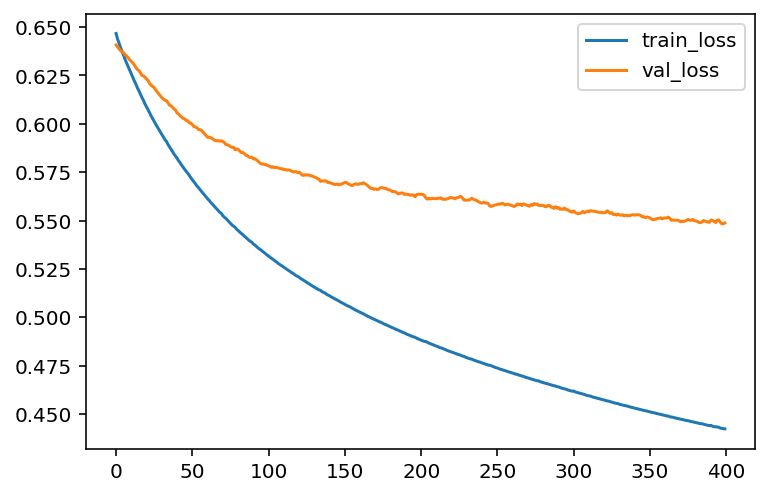

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

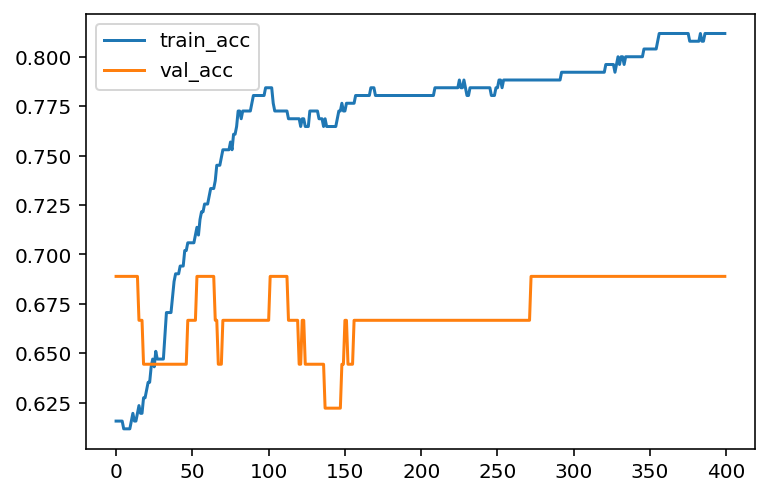

In [15]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [16]:
#| output: false
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))

Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.7366 - accuracy: 0.6333

9/9 [==============================] - 1s 23ms/step - loss: 1.7072 - accuracy: 0.6353 - val_loss: 1.6026 - val_accuracy: 0.6444


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 1.6687 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 1.5285 - accuracy: 0.6353 - val_loss: 1.4433 - val_accuracy: 0.6444


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 1.4621 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 1.3811 - accuracy: 0.6353 - val_loss: 1.3114 - val_accuracy: 0.6444


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2942 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 1.2594 - accuracy: 0.6275 - val_loss: 1.2013 - val_accuracy: 0.6444


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2018 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 1.1578 - accuracy: 0.6314 - val_loss: 1.1095 - val_accuracy: 0.6667


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 1.1259 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 1.0734 - accuracy: 0.6353 - val_loss: 1.0334 - val_accuracy: 0.6667


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0082 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 1.0038 - accuracy: 0.6314 - val_loss: 0.9697 - val_accuracy: 0.6667


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9623 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.9459 - accuracy: 0.6314 - val_loss: 0.9167 - val_accuracy: 0.6889


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9432 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.8977 - accuracy: 0.6275 - val_loss: 0.8723 - val_accuracy: 0.6889


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8762 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.8575 - accuracy: 0.6314 - val_loss: 0.8352 - val_accuracy: 0.6889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8198 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.8244 - accuracy: 0.6275 - val_loss: 0.8046 - val_accuracy: 0.6667


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8107 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.7965 - accuracy: 0.6275 - val_loss: 0.7787 - val_accuracy: 0.6667


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8053 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.7734 - accuracy: 0.6275 - val_loss: 0.7569 - val_accuracy: 0.6667


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7524 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.7540 - accuracy: 0.6235 - val_loss: 0.7392 - val_accuracy: 0.6667


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7126 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.7380 - accuracy: 0.6275 - val_loss: 0.7238 - val_accuracy: 0.6667


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7810 - accuracy: 0.5000

9/9 [==============================] - 0s 8ms/step - loss: 0.7246 - accuracy: 0.6275 - val_loss: 0.7107 - val_accuracy: 0.6667


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7224 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.7135 - accuracy: 0.6196 - val_loss: 0.7000 - val_accuracy: 0.6889


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6825 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.7045 - accuracy: 0.6196 - val_loss: 0.6911 - val_accuracy: 0.6889


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7226 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.6275 - val_loss: 0.6834 - val_accuracy: 0.6889


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7238 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.6275 - val_loss: 0.6772 - val_accuracy: 0.6889


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7590 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.6275 - val_loss: 0.6718 - val_accuracy: 0.6889


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6275 - val_loss: 0.6668 - val_accuracy: 0.6889


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6765 - accuracy: 0.6275 - val_loss: 0.6626 - val_accuracy: 0.6889


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7138 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.6275 - val_loss: 0.6592 - val_accuracy: 0.6889


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6275 - val_loss: 0.6560 - val_accuracy: 0.6889


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.6275 - val_loss: 0.6531 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7318 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.6275 - val_loss: 0.6509 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6648 - accuracy: 0.6275 - val_loss: 0.6491 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7065 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6635 - accuracy: 0.6275 - val_loss: 0.6477 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.6275 - val_loss: 0.6461 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.6275 - val_loss: 0.6446 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.6275 - val_loss: 0.6437 - val_accuracy: 0.6889


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6599 - accuracy: 0.6275 - val_loss: 0.6431 - val_accuracy: 0.6889


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6595 - accuracy: 0.6275 - val_loss: 0.6421 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5000

9/9 [==============================] - 0s 9ms/step - loss: 0.6586 - accuracy: 0.6275 - val_loss: 0.6415 - val_accuracy: 0.6889


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7232 - accuracy: 0.4667

9/9 [==============================] - 0s 9ms/step - loss: 0.6582 - accuracy: 0.6275 - val_loss: 0.6406 - val_accuracy: 0.6889


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6578 - accuracy: 0.6275 - val_loss: 0.6402 - val_accuracy: 0.6889


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.6275 - val_loss: 0.6395 - val_accuracy: 0.6889


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6723 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6571 - accuracy: 0.6275 - val_loss: 0.6392 - val_accuracy: 0.6889


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6776 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6568 - accuracy: 0.6275 - val_loss: 0.6389 - val_accuracy: 0.6889


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6772 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6275 - val_loss: 0.6386 - val_accuracy: 0.6889


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.7667

9/9 [==============================] - 0s 15ms/step - loss: 0.6564 - accuracy: 0.6275 - val_loss: 0.6383 - val_accuracy: 0.6889


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6574 - accuracy: 0.6333

9/9 [==============================] - 0s 17ms/step - loss: 0.6561 - accuracy: 0.6275 - val_loss: 0.6378 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6806 - accuracy: 0.5667

9/9 [==============================] - 0s 15ms/step - loss: 0.6559 - accuracy: 0.6275 - val_loss: 0.6373 - val_accuracy: 0.6889


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.7000

9/9 [==============================] - 0s 17ms/step - loss: 0.6557 - accuracy: 0.6275 - val_loss: 0.6368 - val_accuracy: 0.6889


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6874 - accuracy: 0.5333

9/9 [==============================] - 0s 11ms/step - loss: 0.6556 - accuracy: 0.6275 - val_loss: 0.6369 - val_accuracy: 0.6889


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6185 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6275 - val_loss: 0.6368 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6794 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6040 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6408 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6550 - accuracy: 0.6275 - val_loss: 0.6361 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7126 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6275 - val_loss: 0.6356 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6275 - val_loss: 0.6354 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6548 - accuracy: 0.6275 - val_loss: 0.6351 - val_accuracy: 0.6889


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6546 - accuracy: 0.6275 - val_loss: 0.6350 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5985 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.6546 - accuracy: 0.6275 - val_loss: 0.6351 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6545 - accuracy: 0.6275 - val_loss: 0.6347 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6604 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6544 - accuracy: 0.6275 - val_loss: 0.6346 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.5333

9/9 [==============================] - 0s 9ms/step - loss: 0.6543 - accuracy: 0.6275 - val_loss: 0.6342 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6275 - val_loss: 0.6340 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6543 - accuracy: 0.6275 - val_loss: 0.6336 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6441 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6541 - accuracy: 0.6275 - val_loss: 0.6335 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6850 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6335 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6407 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6537 - accuracy: 0.6275 - val_loss: 0.6328 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6968 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6329 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6113 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6330 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6329 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6342 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6812 - accuracy: 0.5333

9/9 [==============================] - 0s 9ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7128 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6316 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6510 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6313 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6135 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6314 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7354 - accuracy: 0.4333

9/9 [==============================] - 0s 11ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6307 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6308 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6308 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6873 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6305 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6498 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6298 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6298 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6112 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6233 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6300 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7001 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6298 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6280 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7369 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6543 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6795 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5759 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6286 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6598 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7518 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6211 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5950 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5915 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6277 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7034 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7243 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7605 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6051 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6480 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7030 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6544 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6455 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5333

9/9 [==============================] - 0s 9ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6294 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6588 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7117 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6284 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7333

9/9 [==============================] - 0s 12ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6336 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6695 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6000

9/9 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5667

9/9 [==============================] - 0s 10ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6862 - accuracy: 0.5667

9/9 [==============================] - 0s 13ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6741 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6516 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7039 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6196 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6986 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6347 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6642 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6737 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6767 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.6000

9/9 [==============================] - 0s 12ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6504 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.5667

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6333

9/9 [==============================] - 0s 12ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.5667

9/9 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6563 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6480 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6675 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5881 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7408 - accuracy: 0.4333

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5333

9/9 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7268 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5667

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6223 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6600 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6336 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6518 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6190 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6000 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6261 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.5333

9/9 [==============================] - 0s 11ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7208 - accuracy: 0.4667

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6253 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6963 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6986 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6520 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6956 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6333

9/9 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6868 - accuracy: 0.5667

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6412 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5820 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6874 - accuracy: 0.5667

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6311 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7014 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6104 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6097 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.5333

9/9 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7007 - accuracy: 0.5333

9/9 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7082 - accuracy: 0.5000

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6860 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7333

9/9 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6454 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.6000

9/9 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6578 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5963 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6990 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5975 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.5333

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.5000

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6565 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6802 - accuracy: 0.5667

9/9 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6000

9/9 [==============================] - 0s 12ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.5667

9/9 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7333

9/9 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6111 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.7333

9/9 [==============================] - 0s 12ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6883 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7180 - accuracy: 0.4667

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6596 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6000

9/9 [==============================] - 0s 12ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6468 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 12ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6285 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7133 - accuracy: 0.5000

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5928 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6439 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6227 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7146 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6432 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7234 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6408 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7119 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7064 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6225 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7389 - accuracy: 0.4333

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5726 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5812 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7247 - accuracy: 0.5000

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7406 - accuracy: 0.4667

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6975 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7075 - accuracy: 0.5333

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6717 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6000

9/9 [==============================] - 0s 11ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6333

9/9 [==============================] - 0s 10ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6425 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6956 - accuracy: 0.5333

9/9 [==============================] - 0s 10ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6353 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


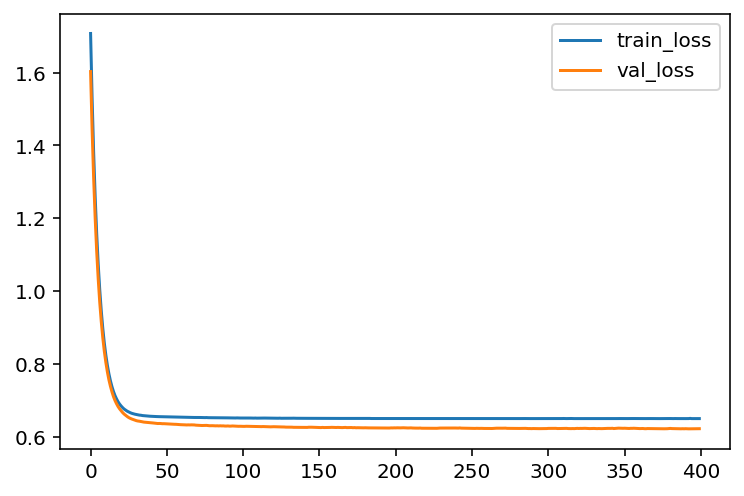

In [17]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

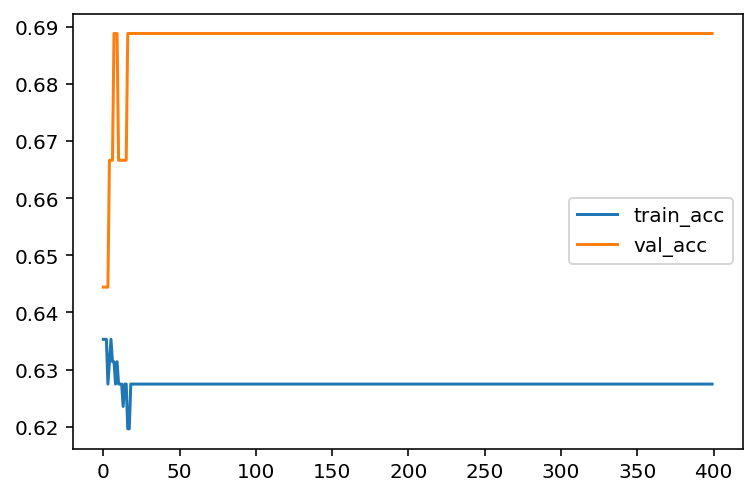

In [18]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

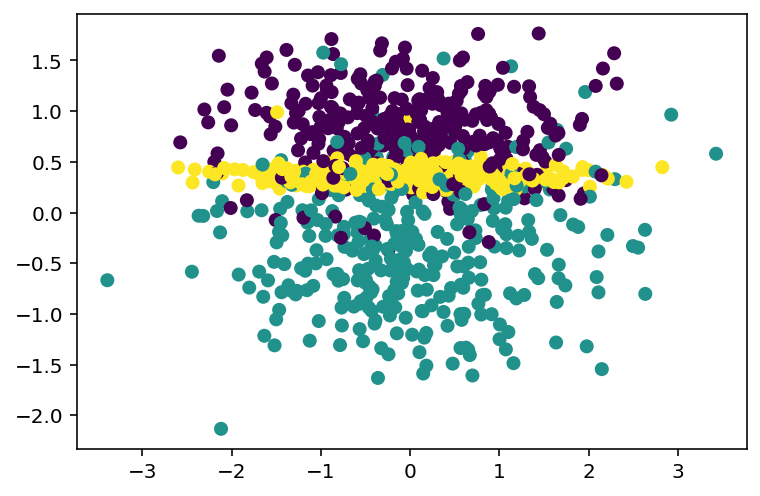

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8466666666666667

In [22]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8266666666666667

In [23]:
#| output: false
import keras_core as keras
from keras.utils import to_categorical
from keras import models, layers

vy_train = to_categorical(y_train, num_classes=3)
vy_test = to_categorical(y_test, num_classes=3)

model = models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_dim=10))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, vy_train, epochs=50, batch_size=50, verbose=0)
_ = model.evaluate(X_test, vy_test)

1/5 [=====>........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.7812

5/5 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7800
